# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

## Importing the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## Dataset Preprocessing

In [3]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
X_train_CNN = X_train
X_test_CNN = X_test
X_train_MLP = np.reshape(X_train, (X_train.shape[0], -1))
X_test_MLP = np.reshape(X_test, (X_test.shape[0], -1))
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Performing PCA on the data

In [5]:
from sklearn.decomposition import PCA
# Compress Image Data
print(X_train.shape) # 3072 values per image 
pca = PCA(n_components = 100)
X_train_comp = pca.fit_transform(X_train)
X_test_comp = pca.transform(X_test)
X_train_comp_MLP = pca.fit_transform(X_train_MLP)
X_test_comp_MLP = pca.transform(X_test_MLP)

(50000, 3072)


In [6]:
print(X_train.shape) # initial image 
print(X_train_comp.shape) # compressed image

(50000, 3072)
(50000, 100)


## Training the models on the training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
classifier1 = KNeighborsClassifier(n_neighbors = 1)
classifier2 = KNeighborsClassifier(n_neighbors = 3)
classifier3 = NearestCentroid()
ts = time.time()
classifier1.fit(X_train_comp, y_train_cat)
t1 = time.time() - ts
classifier2.fit(X_train_comp, y_train_cat)
t2 = time.time() - t1 - ts 
classifier3.fit(X_train_comp, np.ravel(y_train))
t3 = time.time() - t2 - t1 - ts

## Predicting the Test set results

In [13]:
y_pred1 = classifier1.predict(X_test_comp)
y_pred2 = classifier2.predict(X_test_comp)
y_pred3 = classifier3.predict(X_test_comp)

In [27]:
print('Pred3:', labels[int(y_pred3[134])])
print('Pred 2:', labels[int(np.argmax(y_pred2[134]))])

Pred3: airplane
Pred 2: airplane


## Getting the accuracy of the models

In [ ]:
print("KNN with 1 closest neighbour model accuracy on test set:", accuracy_score(y_test_cat, y_pred1))
print("KNN with 1 closest neighbour model accuracy on training set:", accuracy_score(y_train_cat, classifier1.predict(X_train_comp)))
print("Training time:", f'{t1:.4f}', "seconds\n")
print("KNN with 3 closest neighbours model accuracy on test set:",accuracy_score(y_test_cat, y_pred2))
print("KNN with 3 closest neighbours model accuracy on training set:", accuracy_score(y_train_cat, classifier2.predict(X_train_comp)))
print("Training time:", f'{t2:.4f}', "seconds\n")
print("Nearest Centroid model accuracy on test set:",accuracy_score(y_test, y_pred3))
print("Nearest Centroid model accuracy on training set:",accuracy_score(y_train, classifier3.predict(X_train_comp)))
print("Training time:", f'{t3:.4f}', "seconds")

KNN with 1 closest neighbour model accuracy on test set: 0.3853
KNN with 1 closest neighbour model accuracy on training set: 1.0
Training time: 1.8110 seconds

KNN with 3 closest neighbours model accuracy on test set: 0.3108


## Creating a single hidden layer MLP

In [51]:
from sklearn.model_selection import train_test_split
train_time1 = np.zeros(10)
counter = 0
accuracies1 = np.zeros(10)

for i in range(1,11):
    for j in range(3): # triple cross validation
        print(i,j)
        X_train_new, X_val, y_train_new, y_val = train_test_split(
        X_train_comp_MLP, y_train_cat, test_size=0.1)
        mlp = tf.keras.models.Sequential()
        mlp.add(tf.keras.layers.Rescaling(1./255))
        mlp.add(tf.keras.layers.Dense(units= 10*i, activation='relu'))
        mlp.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
        ts = time.time()
        mlp.fit(X_train_new, y_train_new, batch_size = 32, epochs = 10)
        train_time1[i-1] += time.time() - ts
        accuracies1[i-1] += mlp.evaluate(X_val, y_val)[1]
# get averages from cross validation        
accuracies1 /= 3
train_time1 /= 3

1 0
Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.0226 - accuracy: 0.2836
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7472 - accuracy: 0.3796
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6909 - accuracy: 0.4004
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6668 - accuracy: 0.4104
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6516 - accuracy: 0.4119
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6418 - accuracy: 0.4167
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6346 - accuracy: 0.4180
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6292 - accuracy: 0.4176
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6244 - accuracy: 0.4195
Epoch 10/10
157/157 [==============================] - 0s 962us/step - loss: 1

1407/1407 [==============================] - 2s 1ms/step - loss: 1.3570 - accuracy: 0.5201
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3398 - accuracy: 0.5278
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3285 - accuracy: 0.5312
Epoch 10/10
157/157 [==============================] - 0s 1ms/step - loss: 1.4387 - accuracy: 0.5058
6 0
Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7739 - accuracy: 0.3764
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.5338 - accuracy: 0.4660
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.4545 - accuracy: 0.4902
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.4030 - accuracy: 0.5078
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3676 - accuracy: 0.5194
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3417 - accur

Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3953 - accuracy: 0.5111
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3351 - accuracy: 0.5314
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2914 - accuracy: 0.5468
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2603 - accuracy: 0.5573
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2352 - accuracy: 0.5662
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2155 - accuracy: 0.5726
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.1993 - accuracy: 0.5796
Epoch 10/10
157/157 [==============================] - 0s 1ms/step - loss: 1.3814 - accuracy: 0.5230


In [11]:
print(accuracies1)
print(train_time1)

[0.412      0.45673334 0.48206667 0.48513333 0.49693333 0.50313334
 0.51053333 0.50713332 0.52033335 0.52213335]
[17.09016991 17.31913686 16.8799142  17.1742386  16.41457033 16.97359085
 17.07066107 17.09116769 16.90930978 17.79275918]


NameError: name 'train_time2' is not defined

## Creating a double hidden layer MLP

In [52]:
from sklearn.model_selection import train_test_split
train_time2 = np.zeros(10)
counter = 0
accuracies2 = np.zeros(10)

for i in range(1,11):
    for j in range(3): # triple cross validation
        print(i,j)
        X_train_new, X_val, y_train_new, y_val = train_test_split(
        X_train_comp_MLP, y_train_cat, test_size=0.1)
        mlp = tf.keras.models.Sequential()
        mlp.add(tf.keras.layers.Rescaling(1./255))
        mlp.add(tf.keras.layers.Dense(units= 10*i, activation='relu'))
        mlp.add(tf.keras.layers.Dense(units= 5*i, activation='relu')) # layer 2 has half the neurons from layer 1
        mlp.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
        ts = time.time()
        mlp.fit(X_train_new, y_train_new, batch_size = 32, epochs = 10)
        train_time2[i-1] += time.time() - ts
        accuracies2[i-1] += mlp.evaluate(X_val, y_val)[1]
# get averages from cross validation        
accuracies2 /= 3
train_time2 /= 3

1 0
Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 2.0593 - accuracy: 0.2340
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.8239 - accuracy: 0.3274
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7651 - accuracy: 0.3521
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7330 - accuracy: 0.3650
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7096 - accuracy: 0.3738
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6936 - accuracy: 0.3797
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6827 - accuracy: 0.3832
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6750 - accuracy: 0.3846
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6692 - accuracy: 0.3880
Epoch 10/10
157/157 [==============================] - 0s 987us/step - loss: 1

1407/1407 [==============================] - 2s 1ms/step - loss: 1.3457 - accuracy: 0.5236
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3279 - accuracy: 0.5271
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3148 - accuracy: 0.5317
Epoch 10/10
157/157 [==============================] - 0s 994us/step - loss: 1.3703 - accuracy: 0.5142
6 0
Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.7858 - accuracy: 0.3625
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.5329 - accuracy: 0.4576
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.4457 - accuracy: 0.4883
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3903 - accuracy: 0.5064
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3546 - accuracy: 0.5174
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3262 - acc

1407/1407 [==============================] - 2s 1ms/step - loss: 1.3634 - accuracy: 0.5193
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.3029 - accuracy: 0.5421
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2565 - accuracy: 0.5590
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.2213 - accuracy: 0.5698
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.1912 - accuracy: 0.5797
Epoch 8/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.1635 - accuracy: 0.5871
Epoch 9/10
1407/1407 [==============================] - 2s 1ms/step - loss: 1.1447 - accuracy: 0.5967
Epoch 10/10
157/157 [==============================] - 0s 956us/step - loss: 1.3748 - accuracy: 0.5204


In [14]:
print(accuracies2)
print(train_time2)

[0.39226667 0.451      0.46786667 0.4836     0.49906666 0.50613334
 0.50986665 0.51779999 0.51579998 0.51686664]
[17.35726539 17.87496217 19.07342347 18.09237226 18.82096354 20.16346534
 19.7915295  19.3690215  21.35573943 20.03682637]


In [53]:
accuracies = np.vstack((accuracies1,accuracies2))
train_time = np.vstack((train_time1,train_time2))

Text(0.5, 0, 'Neurons on the first layer')

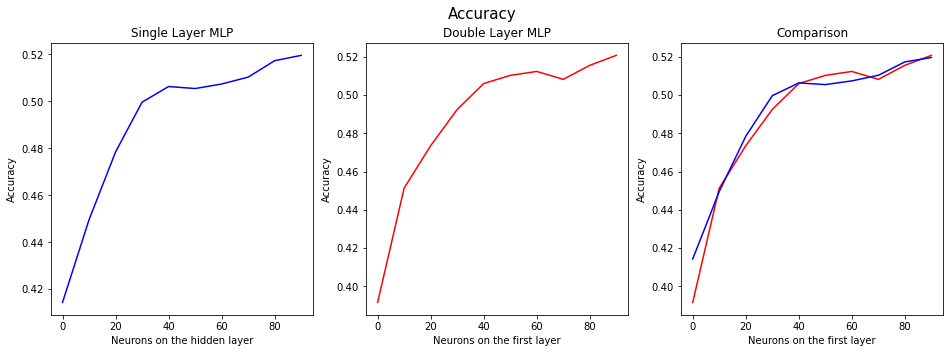

In [55]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ind = np.arange(10)
fig.suptitle("Accuracy", fontsize = 15)
ax1.plot(ind*10,  accuracies[0], color='b')
ax1.title.set_text('Single Layer MLP')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Neurons on the hidden layer')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(ind*10,  accuracies[1], color='r')
ax2.title.set_text('Double Layer MLP')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Neurons on the first layer')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(ind*10,  accuracies[1], color='r', label = 'Double')
ax3.plot(ind*10,  accuracies[0], color='b', label = 'Single')
ax3.title.set_text('Comparison')
ax3.set_ylabel('Accuracy')
ax3.set_xlabel('Neurons on the first layer')

Text(0.5, 0, 'Neurons on the first layer')

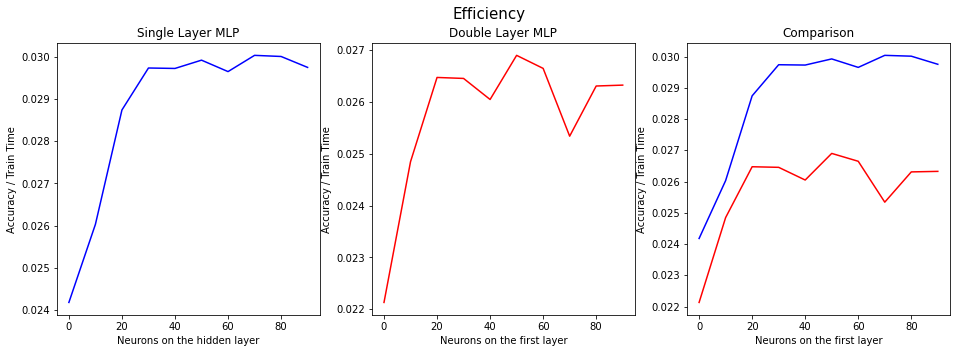

In [56]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("Efficiency", fontsize = 15)
ax1 = fig.add_subplot(1,3,1)
ax1.plot(ind*10,  np.divide(accuracies[0],train_time[0]), color='b')
ax1.title.set_text('Single Layer MLP')
ax1.set_ylabel('Accuracy / Train Time')
ax1.set_xlabel('Neurons on the hidden layer')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(ind*10,  np.divide(accuracies[1],train_time[1]), color='r')
ax2.title.set_text('Double Layer MLP')
ax2.set_ylabel('Accuracy / Train Time')
ax2.set_xlabel('Neurons on the first layer')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(ind*10,  np.divide(accuracies[1],train_time[1]), color='r', label = 'Double')
ax3.plot(ind*10,  np.divide(accuracies[0],train_time[0]), color='b', label = 'Single')
ax3.title.set_text('Comparison')
ax3.set_ylabel('Accuracy / Train Time')
ax3.set_xlabel('Neurons on the first layer')

## Training and testing a Single Layer MLP with a 60-neuron hidden layer

In [57]:
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Rescaling(1./255))
mlp.add(tf.keras.layers.Dense(units= 60, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=10, activation='softmax'))
mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ts = time.time()
mlp.fit(X_train_comp_MLP, y_train_cat, batch_size = 32, epochs = 30)
timeMLP = time.time() - ts

Epoch 1/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7886 - accuracy: 0.3752
Epoch 2/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5327 - accuracy: 0.4628
Epoch 3/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4516 - accuracy: 0.4908
Epoch 4/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3994 - accuracy: 0.5093
Epoch 5/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3614 - accuracy: 0.5201
Epoch 6/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3352 - accuracy: 0.5302
Epoch 7/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3151 - accuracy: 0.5346
Epoch 8/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2980 - accuracy: 0.5427
Epoch 9/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2861 - accuracy: 0.5456
Epoch 10/30
1563/1563 [==============================] - 2s 1ms/step - loss: 1.276

In [73]:
print("Single Layer MLP model accuracy (60 neurons) on test set:", f'{mlp.evaluate(X_test_comp_MLP, y_test_cat)[1]:.4f}')
print("Single Layer MLP model accuracy (60 neurons) on training set:", f'{mlp.evaluate(X_train_comp_MLP, y_train_cat)[1]:.4f}')
print("Training time:", f'{timeMLP:.4f}', "seconds")

313/313 [==============================] - 0s 1ms/step - loss: 1.3755 - accuracy: 0.5199
Single Layer MLP model accuracy (60 neurons) on test set: 0.5199
1563/1563 [==============================] - 2s 992us/step - loss: 1.1789 - accuracy: 0.5827
Single Layer MLP model accuracy (60 neurons) on training set: 0.5827
Training time: 56.1973 seconds


In [77]:
print(labels[np.argmax(mlp.predict(X_train_comp_MLP[635].reshape(1,-1)))])

1/1 [==============================] - 0s 17ms/step
cat


## Data preprocessing for CNN

In [82]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)
train_datagen.fit(X_train_CNN)
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_datagen.std = train_datagen.std
test_datagen.mean = train_datagen.mean

## Single ConvLayer CNN with previous MLP

In [83]:
cnn = tf.keras.models.Sequential()
#cnn.add(tf.keras.layers.Rescaling(1./255))
#cnn.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
#cnn.add(tf.keras.layers.RandomRotation(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 60, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [84]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ts = time.time()
cnn.fit(train_datagen.flow(X_train_CNN, y_train_cat, batch_size=32,
         subset='training'),
         validation_data=train_datagen.flow(X_train_CNN, y_train_cat,
         batch_size=8, subset='validation'),epochs=30)
timeCNN1 = time.time() - ts

Epoch 1/30
1250/1250 [==============================] - 35s 27ms/step - loss: 1.6848 - accuracy: 0.3843 - val_loss: 1.4857 - val_accuracy: 0.4599
Epoch 2/30
1250/1250 [==============================] - 36s 29ms/step - loss: 1.4398 - accuracy: 0.4807 - val_loss: 1.3675 - val_accuracy: 0.5121
Epoch 3/30
1250/1250 [==============================] - 37s 30ms/step - loss: 1.3291 - accuracy: 0.5222 - val_loss: 1.3335 - val_accuracy: 0.5270
Epoch 4/30
1250/1250 [==============================] - 35s 28ms/step - loss: 1.2715 - accuracy: 0.5450 - val_loss: 1.2378 - val_accuracy: 0.5562
Epoch 5/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2296 - accuracy: 0.5639 - val_loss: 1.2313 - val_accuracy: 0.5610
Epoch 6/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2010 - accuracy: 0.5770 - val_loss: 1.1740 - val_accuracy: 0.5865
Epoch 7/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1688 - accuracy: 0.5851 - val_loss: 1.1742 -

In [89]:
print("Single convolution layer CNN accuracy on training set:", f'{cnn.evaluate(test_datagen.flow(X_train_CNN, y_train_cat, batch_size=32))[1]:.4f}')
print("Single convolution layer CNN accuracy on test set:", f'{cnn.evaluate(test_datagen.flow(X_test_CNN, y_test_cat, batch_size=32))[1]:.4f}')
print("Training time:", f'{timeCNN1:.4f}', "seconds")

1563/1563 [==============================] - 7s 4ms/step - loss: 0.8667 - accuracy: 0.7009
Double convolution layer CNN accuracy on training set: 0.7009
313/313 [==============================] - 1s 4ms/step - loss: 0.9185 - accuracy: 0.6803
Double convolution layer CNN accuracy on test set: 0.6803
Training time: 1087.3084 seconds


## Double ConvLayer CNN with Dropout layers

In [85]:
cnn2 = tf.keras.models.Sequential()
#cnn2.add(tf.keras.layers.Rescaling(1./255))
#cnn2.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))
#cnn2.add(tf.keras.layers.RandomRotation(0.2))
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn2.add(tf.keras.layers.Dropout(0.25))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn2.add(tf.keras.layers.Dropout(0.25))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dense(units= 128, activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [86]:
cnn2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ts = time.time()
cnn2.fit(train_datagen.flow(X_train_CNN, y_train_cat, batch_size=32,
         subset='training'),
         validation_data=train_datagen.flow(X_train_CNN, y_train_cat,
         batch_size=8, subset='validation'),epochs=30)
timeCNN2 = time.time() - ts

Epoch 1/30
1250/1250 [==============================] - 132s 105ms/step - loss: 1.7260 - accuracy: 0.3585 - val_loss: 1.5781 - val_accuracy: 0.4224
Epoch 2/30
1250/1250 [==============================] - 117s 93ms/step - loss: 1.4317 - accuracy: 0.4778 - val_loss: 1.3214 - val_accuracy: 0.5247
Epoch 3/30
1250/1250 [==============================] - 120s 96ms/step - loss: 1.3113 - accuracy: 0.5268 - val_loss: 1.2572 - val_accuracy: 0.5451
Epoch 4/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.2354 - accuracy: 0.5572 - val_loss: 1.1713 - val_accuracy: 0.5849
Epoch 5/30
1250/1250 [==============================] - 122s 98ms/step - loss: 1.1825 - accuracy: 0.5792 - val_loss: 1.0882 - val_accuracy: 0.6120
Epoch 6/30
1250/1250 [==============================] - 123s 98ms/step - loss: 1.1441 - accuracy: 0.5878 - val_loss: 1.0830 - val_accuracy: 0.6081
Epoch 7/30
1250/1250 [==============================] - 120s 96ms/step - loss: 1.1171 - accuracy: 0.6023 - val_loss: 

In [38]:
print("Double convolution layer CNN accuracy on training set:", f'{cnn2.evaluate(test_datagen.flow(X_train_CNN, y_train_cat, batch_size=32))[1]:.4f}')
print("Double convolution layer CNN accuracy on test set:", f'{cnn2.evaluate(test_datagen.flow(X_test_CNN, y_test_cat, batch_size=32))[1]:.4f}')
print("Training time:", f'{timeCNN2:.4f}', "seconds")


1563/1563 [==============================] - 21s 13ms/step - loss: 0.7663 - accuracy: 0.7347
Double convolution layer CNN accuracy on training set: 0.7347
313/313 [==============================] - 4s 12ms/step - loss: 0.8160 - accuracy: 0.7197
Double convolution layer CNN accuracy on test set: 0.7197
Training time: 3893.6508 seconds


## image Examples

1/1 [==============================] - 0s 19ms/step


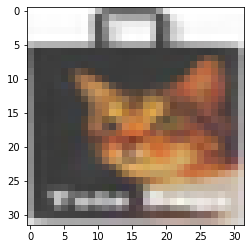

In [108]:
index = 3000 # for report pics: 376, 2000, 3000
plt.imshow(X_train_CNN[index])
plt.show
pred1 = classifier1.predict(X_train_comp[index].reshape(1,-1))
pred2 = classifier2.predict(X_train_comp[index].reshape(1,-1))
pred3 = classifier3.predict(X_train_comp_MLP[index].reshape(1,-1))
pred4 = mlp.predict(X_train_comp_MLP[index].reshape(1,-1))
pred5 = cnn.predict(np.expand_dims(X_train_CNN[index], axis = 0))
pred6 = cnn2.predict(np.expand_dims(X_train_CNN[index], axis = 0))

In [109]:
print('KNN with 1 nearest neighbour:',labels[int(np.argmax(pred1))]) 
print('KNN with 3 nearest neighbours:',labels[int(np.argmax(pred2))]) 
print('Nearest Centroid:', labels[int(pred3)]) 
print('MLP:', labels[np.argmax(pred4)])
print('Single Convolution CNN:', labels[np.argmax(pred5)])
print('Double Convolution CNN:', labels[np.argmax(pred6)])
print('True label:', labels[int(y_train[index])])

KNN with 1 nearest neighbour: cat
KNN with 3 nearest neighbours: cat
Nearest Centroid: truck
MLP: horse
Single Convolution CNN: truck
Double Convolution CNN: airplane
True label: cat
